## Visualizing the best model used on the labeled dataset

In [27]:
import pandas as pd

# Creating the DataFrame from the data shown in the image
data = {
    'model_name': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost'],
    'BER': [0.241357, 0.500000, 0.173175, 0.302497, 0.150448],
    'recall': [0.545455, 0.000000, 0.681818, 0.409091, 0.727273],
    'accuracy': [0.870968, 0.763441, 0.903226, 0.849462, 0.913978]
}

df = pd.DataFrame(data)
df

,model_name,BER,recall,accuracy
0,Logistic Regression,0.241357,0.545455,0.870968
1,Naive Bayes,0.500000,0.000000,0.763441
2,SVM,0.173175,0.681818,0.903226
3,Random Forest,0.302497,0.409091,0.849462
4,XGBoost,0.150448,0.727273,0.913978


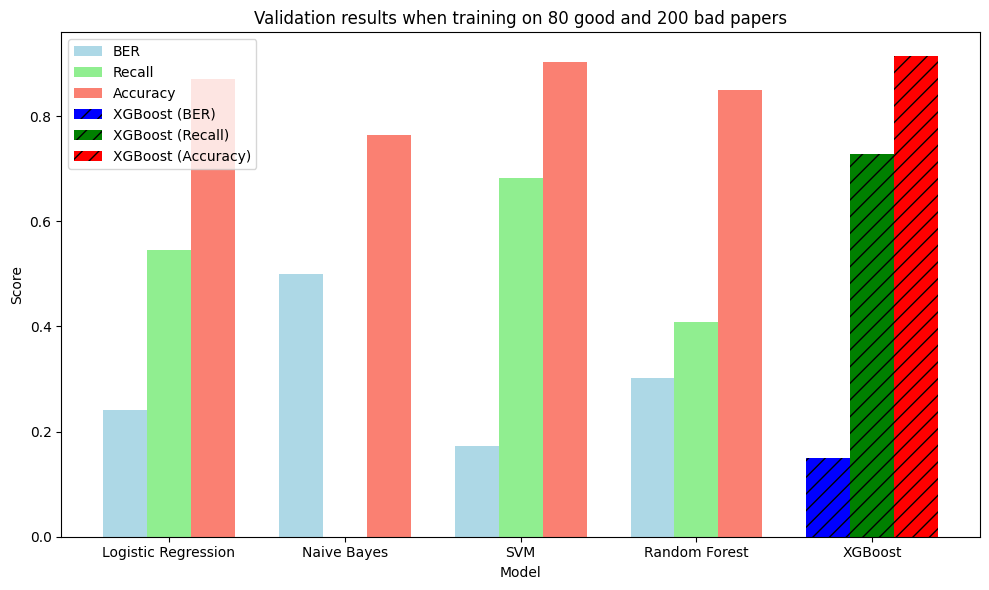

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for models
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost']
BER = [0.241357, 0.5, 0.173175, 0.302497, 0.150448]
recall = [0.545455, 0, 0.681818, 0.409091, 0.727273]
accuracy = [0.870968, 0.763441, 0.903226, 0.849462, 0.913978]

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'BER': BER,
    'Recall': recall,
    'Accuracy': accuracy
})

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a bar
width = 0.25
x = range(len(df))

ax.bar(x, df['BER'], width, label='BER', color='lightblue')
ax.bar([p + width for p in x], df['Recall'], width, label='Recall', color='lightgreen')
ax.bar([p + width * 2 for p in x], df['Accuracy'], width, label='Accuracy', color='salmon')

# Highlight XGBoost
ax.bar(x[4], df['BER'][4], width, label='XGBoost (BER)', color='blue', hatch='//')
ax.bar(x[4] + width, df['Recall'][4], width, label='XGBoost (Recall)', color='green', hatch='//')
ax.bar(x[4] + width * 2, df['Accuracy'][4], width, label='XGBoost (Accuracy)', color='red', hatch='//')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
# ax.set_title('Model Evaluation Metrics for labeled data')
ax.set_title('Validation results when training on 80 good and 200 bad papers')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(df['Model'])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


## Visualizing the best classification method based on the large corpus of scraped paper

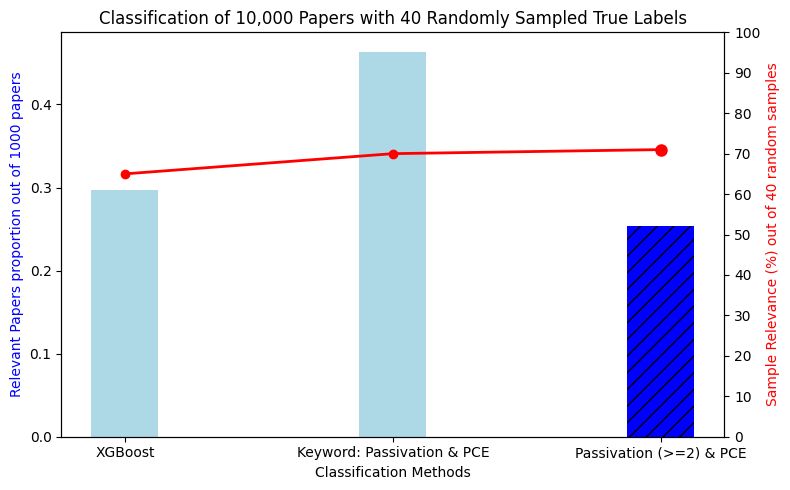

In [28]:
import matplotlib.pyplot as plt

# Data
methods = ['XGBoost', 'Keyword: Passivation & PCE', 'Passivation (>=2) & PCE']
papers_relevant = [2972 / 10000, 4637/ 10000, 2539/ 10000]
sample_relevance = [65, 70, 71]
# sample_relevance_bare = [60, 67.5, 52.5 ]


# Plotting the updated chart for the previous visualization with highlighting on the farthest right bar (XGBoost)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the relevant papers count
ax1.bar(methods, papers_relevant, width, label='Papers Relevant', color='lightblue')

# Create a secondary axis for sample relevance percentage
ax2 = ax1.twinx()
ax2.plot(methods, sample_relevance, color='r', marker='o', label='Sample Relevance (%)', linestyle='-', linewidth=2)

# Highlight XGBoost
ax1.bar(methods[2], papers_relevant[2], width, label='XGBoost (Papers Relevant)', color='blue', hatch='//')
ax2.plot(methods[2], sample_relevance[2], 'ro', label='XGBoost (Sample Relevance)', markersize=8)

# Set y-axis limits for sample relevance to start from 0
ax2.set_ylim(0, 100)
ax2.set_yticks(range(0, 101, 10))



# # Create figure with adjusted y-axis for sample relevance
# fig, ax1 = plt.subplots(figsize=(8, 5))

# # Plot the relevant papers count
# ax1.bar(methods, papers_relevant, color='b', alpha=0.7, label='Papers Relevant', width=0.4, align='center')

# # Create a secondary axis for sample relevance percentage
# ax2 = ax1.twinx()
# ax2.plot(methods, sample_relevance, color='r', marker='o', label='Sample Relevance (%)', linestyle='-', linewidth=2)

# # Set y-axis limits for sample relevance to start from 0
# ax2.set_ylim(0, 100)

# # Create a secondary axis for sample relevance percentage
# # ax3 = ax1.twinx()
# # ax3.plot(methods, sample_relevance_bare, color='r', marker='o', label='Sample Relevance (%)', linestyle='-', linewidth=2)

# # # Set y-axis limits for sample relevance to start from 0
# # ax3.set_ylim(0, 100)

# Add labels and title
ax1.set_xlabel('Classification Methods')
ax1.set_ylabel('Relevant Papers proportion out of 1000 papers', color='b')
ax2.set_ylabel('Sample Relevance (%) out of 40 random samples', color='r')
ax1.set_title("Classification of 10,000 Papers with 40 Randomly Sampled True Labels")

# Display the figure
fig.tight_layout()
plt.show()
